In [138]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from collections import defaultdict
from sklearn.utils import resample
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
import usefulFunctions as useful
import eval_functions as metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
fileName = "Master_PL.xlsx - Master_PL.csv"
normalized_table = pd.read_csv(fileName, header=0, 
                    names=["id", "type", "gender", "age", "monthsFromScreening", "protein_BL", "protein_V4",
                          "protein_V6", "protein_V8", "protein_V10", "protein_V12"])

In [140]:
def make_binary(x):
    return x-1

def make_boolean(x):
    if x:
        return bool(x)
    else:
        return bool(x)
def standardize(x, mean, std):
    return (x - mean)/std

def support(column):
    counts = defaultdict(int)
    
    for value in column:
        counts[value]+=1
    
    for key in counts:
        counts[key] = counts[key]/float(len(column))
    
    return counts

In [141]:
normalized_table.type = normalized_table.type.apply(make_binary)
normalized_table.gender = normalized_table.gender.apply(make_binary)

In [142]:
age_mean = np.mean(normalized_table.age)
age_std = np.std(normalized_table.age)

monthsFromScreening_mean = np.mean(normalized_table.monthsFromScreening)
monthsFromScreening_std = np.std(normalized_table.monthsFromScreening)

In [143]:
normalized_table.age = normalized_table.age.apply(lambda x: standardize(x, age_mean, age_std))
normalized_table.monthsFromScreening = normalized_table.monthsFromScreening.apply(lambda x: standardize(x, 
                                                                                             monthsFromScreening_mean,\
                                                                                             monthsFromScreening_std))

In [144]:
normalized_table = normalized_table[(normalized_table.protein_BL > 5) & (normalized_table.protein_V4 > 5) & (normalized_table.protein_V6 > 5) & 
             (normalized_table.protein_V8 > 5)]

len(normalized_table)
normalized_table.type.value_counts()

1    190
0     84
Name: type, dtype: int64

In [145]:
female_norm_table = normalized_table[normalized_table.gender == 0]
male_norm_table = normalized_table[normalized_table.gender == 1]

In [146]:
bl_mean = np.mean(female_norm_table.protein_BL)
bl_std = np.std(female_norm_table.protein_BL)

v4_mean = np.mean(female_norm_table.protein_V4)
v4_std = np.std(female_norm_table.protein_V4)

v6_mean = np.mean(female_norm_table.protein_V6)
v6_std = np.std(female_norm_table.protein_V6)

v8_mean = np.mean(female_norm_table.protein_V8)
v8_std = np.std(female_norm_table.protein_V8)

v10_mean = np.mean(female_norm_table.protein_V10)
v10_std = np.std(female_norm_table.protein_V10)

v12_mean = np.mean(female_norm_table.protein_V12)
v12_std = np.std(female_norm_table.protein_V12)

female_norm_table.protein_BL = female_norm_table.protein_BL.apply(lambda x : standardize(x, bl_mean, bl_std))
female_norm_table.protein_V4 = female_norm_table.protein_V4.apply(lambda x : standardize(x, v4_mean, v4_std))
female_norm_table.protein_V6 = female_norm_table.protein_V6.apply(lambda x : standardize(x, v6_mean, v6_std))
female_norm_table.protein_V8 = female_norm_table.protein_V8.apply(lambda x : standardize(x, v8_mean, v8_std))
female_norm_table.protein_V10 = female_norm_table.protein_V10.apply(lambda x : standardize(x, v10_mean, v10_std))
female_norm_table.protein_V12 = female_norm_table.protein_V12.apply(lambda x : standardize(x, v12_mean, v12_std))

In [147]:
bl_mean = np.mean(male_norm_table.protein_BL)
bl_std = np.std(male_norm_table.protein_BL)

v4_mean = np.mean(male_norm_table.protein_V4)
v4_std = np.std(male_norm_table.protein_V4)

v6_mean = np.mean(male_norm_table.protein_V6)
v6_std = np.std(male_norm_table.protein_V6)

v8_mean = np.mean(male_norm_table.protein_V8)
v8_std = np.std(male_norm_table.protein_V8)

v10_mean = np.mean(male_norm_table.protein_V10)
v10_std = np.std(male_norm_table.protein_V10)

v12_mean = np.mean(male_norm_table.protein_V12)
v12_std = np.std(male_norm_table.protein_V12)

male_norm_table.protein_BL = male_norm_table.protein_BL.apply(lambda x : standardize(x, bl_mean, bl_std))
male_norm_table.protein_V4 = male_norm_table.protein_V4.apply(lambda x : standardize(x, v4_mean, v4_std))
male_norm_table.protein_V6 = male_norm_table.protein_V6.apply(lambda x : standardize(x, v6_mean, v6_std))
male_norm_table.protein_V8 = male_norm_table.protein_V8.apply(lambda x : standardize(x, v8_mean, v8_std))
male_norm_table.protein_V10 = male_norm_table.protein_V10.apply(lambda x : standardize(x, v10_mean, v10_std))
male_norm_table.protein_V12 = male_norm_table.protein_V12.apply(lambda x : standardize(x, v12_mean, v12_std))

In [148]:
print(male_norm_table[["protein_BL", "type"]].type.value_counts())
print(male_norm_table[["protein_V4", "type"]].type.value_counts())
print(male_norm_table[["protein_V6", "type"]].type.value_counts())
print(male_norm_table[["protein_V8", "type"]].type.value_counts())
print(male_norm_table[["protein_V10", "type"]].type.value_counts())
print(male_norm_table[["protein_V12", "type"]].type.value_counts())

1    127
0     54
Name: type, dtype: int64
1    127
0     54
Name: type, dtype: int64
1    127
0     54
Name: type, dtype: int64
1    127
0     54
Name: type, dtype: int64
1    127
0     54
Name: type, dtype: int64
1    127
0     54
Name: type, dtype: int64


In [149]:
print(female_norm_table[["protein_BL", "type"]].type.value_counts())
print(female_norm_table[["protein_V4", "type"]].type.value_counts())
print(female_norm_table[["protein_V6", "type"]].type.value_counts())
print(female_norm_table[["protein_V8", "type"]].type.value_counts())
print(female_norm_table[["protein_V10", "type"]].type.value_counts())
print(female_norm_table[["protein_V12", "type"]].type.value_counts())

1    63
0    30
Name: type, dtype: int64
1    63
0    30
Name: type, dtype: int64
1    63
0    30
Name: type, dtype: int64
1    63
0    30
Name: type, dtype: int64
1    63
0    30
Name: type, dtype: int64
1    63
0    30
Name: type, dtype: int64


In [214]:
df_majority = male_norm_table[male_norm_table.type==1]
print len(df_majority)
df_minority = male_norm_table[male_norm_table.type==0]
print len(df_minority)
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.type.value_counts()

# df_majority = female_norm_table[female_norm_table.type==1]
# print len(df_majority)
# df_minority = female_norm_table[female_norm_table.type==0]
# print len(df_minority)
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,
#                                  n_samples=len(df_majority),
#                                  random_state=123)
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# df_upsampled.type.value_counts()

127
54


1    127
0    127
Name: type, dtype: int64

In [201]:
X = df_upsampled[['age', 'protein_BL', 'protein_V4', 'protein_V6', 'protein_V8']].as_matrix()
y = df_upsampled[['type']].as_matrix()
y = np.squeeze(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=3)

In [202]:
forest = RandomForestClassifier(n_estimators=30, random_state=1, min_samples_leaf=1)
tree_clf = tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=1)

In [203]:
forest.fit(X_train, y_train)
clf = forest

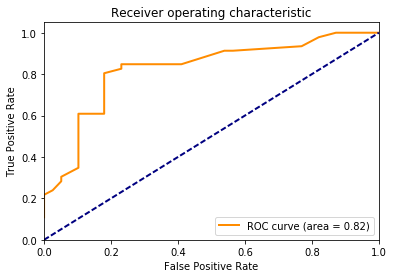

In [204]:
roc_info = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
auc_info = auc(roc_info[0], roc_info[1])
useful.createROCGraph(roc_info[0], roc_info[1], auc_info)

Normalized confusion matrix
[[ 0.9   0.1 ]
 [ 0.48  0.52]]


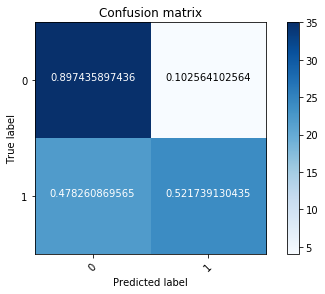

In [205]:
cm = confusion_matrix(y_test, clf.predict(X_test))
useful.plot_confusion_matrix(cm, ["0", "1"])

In [206]:
y_test, clf.predict(X_test)

(array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]),
 array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]))

In [207]:
scores = cross_val_score(clf, X, y, cv=10)
print("Cross Fold Mean: %.3f, Cross Fold Stdev: %.3f" % (np.mean(scores), np.std(scores)))

Cross Fold Mean: 0.764, Cross Fold Stdev: 0.066


In [208]:
metrics_dict = metrics.get_all_metrics(y_test, clf.predict(X_test))
print(metrics.pretty_print_metrics(metrics_dict))

accuracy: 0.694

precision: 
	all: ['0.614', '0.857']
	micro: 0.694
	macro: 0.736
	weighted: 0.746
	
recall: 
	all: ['0.897', '0.522']
	micro: 0.694
	macro: 0.710
	weighted: 0.694
	
f1_measure: 
	all: ['0.729', '0.649']
	micro: 0.694
	macro: 0.689
	weighted: 0.686
	
support: 
	y_true_dist: ['0.459', '0.541']
	y_true_count: 85.000
	y_predicted_dist: ['0.671', '0.329']
	y_predicted_count: 85.000
	



In [209]:
clf.feature_importances_

array([ 0.18,  0.2 ,  0.21,  0.18,  0.23])

In [210]:
X = df_upsampled[['age', 'protein_BL', 'protein_V4', 'protein_V6', 'protein_V8']].as_matrix()
y = df_upsampled[['type']].as_matrix()
y = np.squeeze(y)
forest = RandomForestClassifier(n_estimators=30, random_state=1, min_samples_leaf=1)

In [211]:
def average_stats(clf, X, y):
    stats = {"mean_accuracy" : 0.0,
             "median_accuracy" : 0.0,
             "mean_precision" : 0.0,
             "median_precision" : 0.0,
             "mean_recall" : 0.0,
             "median_recall" : 0.0,
             "mean_f1_measure" : 0.0,
             "median_f1_measure" : 0.0}
    accuracy = []
    precision = []
    recall = []
    f1_measure = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=i**2)
        clf.fit(X_train, y_train)
        metrics_dict = metrics.get_all_metrics(y_test, clf.predict(X_test))
        accuracy.append(metrics_dict["accuracy"])
        precision.append(metrics_dict["precision"]["macro"])
        recall.append(metrics_dict["recall"]["macro"])
        f1_measure.append(metrics_dict["f1_measure"]["macro"])
        
    stats["mean_accuracy"] = np.mean(accuracy)
    stats["median_accuracy"] = np.median(accuracy)
    
    stats["mean_precision"] = np.mean(precision)
    stats["median_precision"] = np.median(precision)
    
    stats["mean_recall"] = np.mean(recall)
    stats["median_recall"] = np.median(recall)
    
    stats["mean_f1_measure"] = np.mean(f1_measure)
    stats["median_f1_measure"] = np.median(f1_measure)
    
    return stats
    

In [212]:
stats = average_stats(forest, X, y)
keys = stats.keys()
keys.sort()
for key in keys:
    print str(key) + ": %.3f" %stats[key]

mean_accuracy: 0.761
mean_f1_measure: 0.759
mean_precision: 0.776
mean_recall: 0.765
median_accuracy: 0.759
median_f1_measure: 0.757
median_precision: 0.764
median_recall: 0.759
